In [10]:
def get_2x2_filters(n):
    matrix = [[i * n + j + 1 for j in range(n)] for i in range(n)]
    filters = {}
    count = 1
    
    for i in range(n - 1):
        for j in range(n - 1):
            f = [
                matrix[i][j],
                matrix[i][j + 1],
                matrix[i + 1][j],
                matrix[i + 1][j + 1]
            ]
            filters[count] = f
            count += 1
    return filters

# Example
n = 3
filters = get_2x2_filters(n)
for k, v in filters.items():
    print(v[0])


1
2
4
5


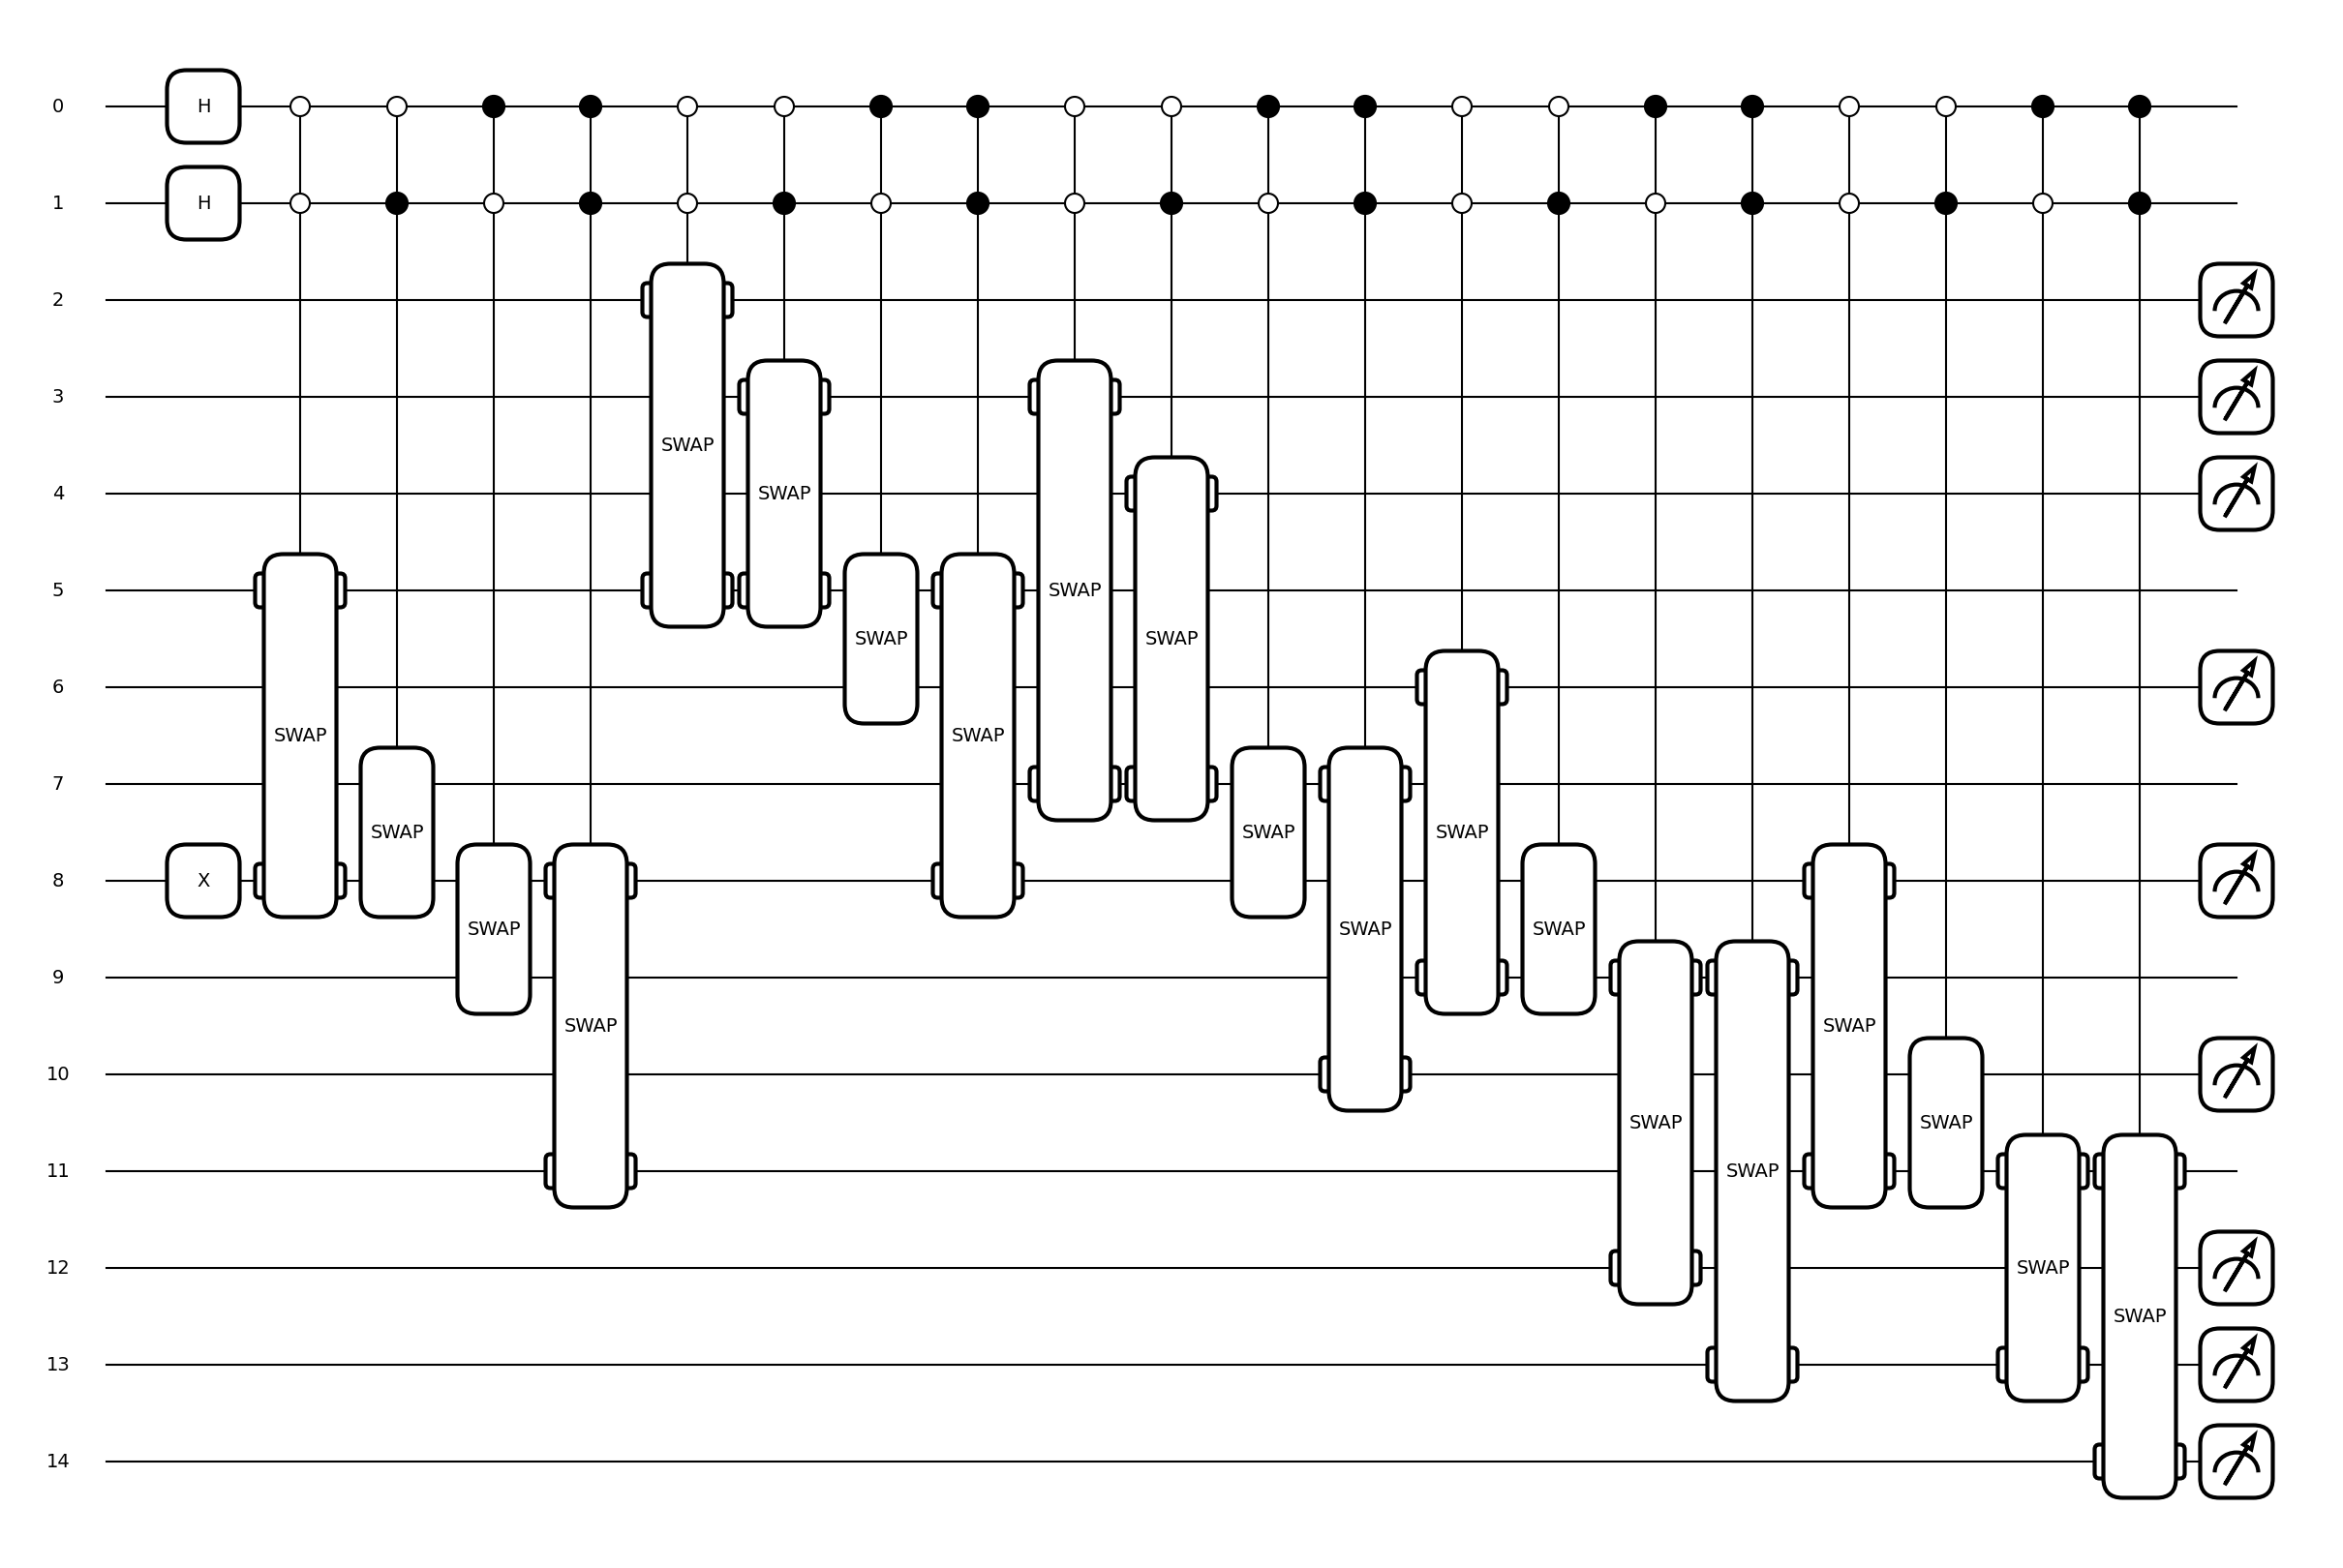

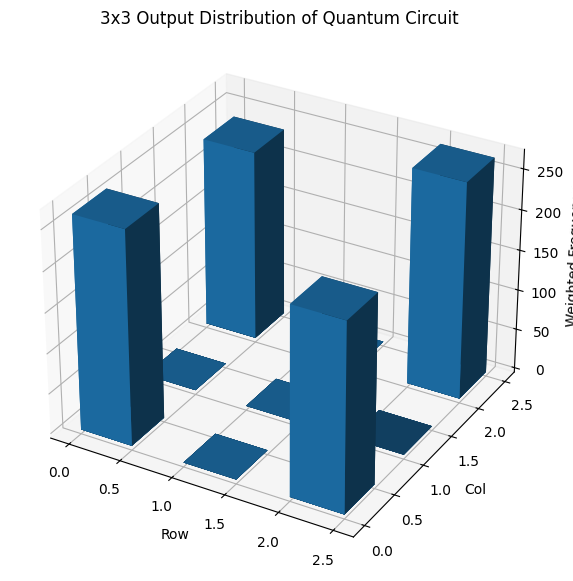

In [40]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
dev = qml.device("default.qubit", wires=15, shots=1000)

@qml.qnode(dev)
def circuit():

    
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.PauliX(wires = 8)

    #Layeeeeeeer 1:
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,0])(wires=[8, 5])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,1])(wires=[8, 7])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,0])(wires=[8, 9])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,1])(wires=[8, 11])

    #Layeeeeeeeeeeer2:
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    # Peg1:
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,0])(wires=[5, 2])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,1])(wires=[5, 3])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,0])(wires=[5, 6])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,1])(wires=[5, 8])
    # Peg2:
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,0])(wires=[7, 3])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,1])(wires=[7, 4])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,0])(wires=[7, 8])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,1])(wires=[7, 10])
    # Peg3:
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,0])(wires=[9, 6])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,1])(wires=[9, 8])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,0])(wires=[9, 12])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,1])(wires=[9, 13])
    # Peeg4:
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,0])(wires=[11, 8])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[0,1])(wires=[11, 10])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,0])(wires=[11, 13])
    qml.ctrl(qml.SWAP, control=[0, 1], control_values=[1,1])(wires=[11, 14])

    
    

    return qml.sample(wires=[2,3,4,6,8,10,12,13,14])

drawer= qml.draw_mpl(circuit)()
# Run the circuit
samples = circuit()

# Convert samples to 3x3 strings
patterns = [''.join(map(str, sample.reshape(-1))) for sample in samples]

# Count occurrences
counts = Counter(patterns)

# Plot as 3D bar chart
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create 3x3 grid positions
xs = []
ys = []
zs = []
vals = []

for pattern, count in counts.items():
    matrix = np.array(list(map(int, pattern))).reshape((3, 3))
    for i in range(3):
        for j in range(3):
            xs.append(i)
            ys.append(j)
            zs.append(0)
            vals.append(matrix[i, j] * count)

dx = dy = 0.5
dz = vals

ax.bar3d(xs, ys, zs, dx, dy, dz, shade=True)
ax.set_xlabel("Row")
ax.set_ylabel("Col")
ax.set_zlabel("Weighted Frequency")

plt.title("3x3 Output Distribution of Quantum Circuit")
plt.show()
